# Emozo Experiment Primary Data Analysis

## Data Preparation

In [3]:
import copy as cp
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Importing data and setting default values
image_data = pd.read_csv('emozo_image_results.csv')
video_data = pd.read_csv('emozo_video_results.csv')
happiness_thres = -1
sadness_thres = -1
sns.set_theme(style="whitegrid")

## Outlier Eilimination (turn into code to activate)

#Eliminating Outliers
cols = []
for x in range(1,67):
    if x < 10:
        cols.append(f"Sad - 0{x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0")
    else:
        cols.append(f"Sad - {x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0")

video_data['Average'] = video_data[cols].max(axis=1)

to_drop = video_data[video_data['Average'] >= video_data['Average'].quantile(.95)].index
to_drop = video_data[video_data['Average'] <= video_data['Average'].quantile(.05)].index

video_data.drop(to_drop, inplace=True)

cols = []
for x in range(1,21):
    if x < 10:
        cols.append(f"Happy - 0{x} - emozo_image_video.mp4_0_0")
    else:
        cols.append(f"Happy - {x} - emozo_image_video.mp4_0_0")
        
image_data['Average'] = image_data[cols].max(axis=1)

to_drop = image_data[image_data['Average'] >= image_data['Average'].quantile(.95)].index
image_data.drop(to_drop, inplace=True)

to_drop = image_data[image_data['Average'] <= image_data['Average'].quantile(.05)].index
image_data.drop(to_drop, inplace=True)



## Image Survey: Individual Response Analysis for Exceeding Baseline

In [5]:
happiness_sum = []
sadness_sum = []

#Appends data averages for each second to above lists
for x in range(1,21):
    if x < 10:
        happiness_sum.append(image_data[f"Happy - 0{x} - emozo_image_video.mp4_0_0"].mean())
        sadness_sum.append(image_data[f"Sad - 0{x} - emozo_image_video.mp4_0_0"].mean())
    else:
        happiness_sum.append(image_data[f"Happy - {x} - emozo_image_video.mp4_0_0"].mean())
        sadness_sum.append(image_data[f"Sad - {x} - emozo_image_video.mp4_0_0"].mean())

#Calculates desired values from the data arrays
happiness_stdev = statistics.pstdev(happiness_sum[0:9])
sadness_stdev = statistics.pstdev(sadness_sum[0:9])
happiness_min = min(happiness_sum[0:9])
sadness_max = max(sadness_sum[0:9])
happiness_max = max(happiness_sum[0:9])
sadness_min = min(sadness_sum[0:9])

image_df = pd.DataFrame(sadness_sum, columns = ['Sadness'])

happiness_df = pd.DataFrame(happiness_sum, columns = ['value'])

image_df['Happiness'] = happiness_df['value']
image_df['Baseline Happiness Cap'] = happiness_max
image_df['Baseline Sadness Floor'] = sadness_min

#Video Analytics
#Same Process as prior experiment

happiness_sum = []
sadness_sum = []

for x in range(1,67):
    if x < 10:
        happiness_sum.append(video_data[f"Happy - 0{x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0"].mean())
        sadness_sum.append(video_data[f"Sad - 0{x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0"].mean())
    else:
        happiness_sum.append(video_data[f"Happy - {x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0"].mean())
        sadness_sum.append(video_data[f"Sad - {x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0"].mean())

video_df = pd.DataFrame(sadness_sum, columns = ['Sadness'])

happiness_df = pd.DataFrame(happiness_sum, columns = ['value'])

#Video-specific data
video_df['Happiness'] = happiness_df['value']
video_df['Baseline Happiness Floor'] = happiness_min
video_df['Baseline Sadness Cap'] = sadness_max

print(video_df)



     Sadness  Happiness  Baseline Happiness Floor  Baseline Sadness Cap
0   0.061409   0.010774                  0.044183              0.082509
1   0.043144   0.003476                  0.044183              0.082509
2   0.052291   0.022105                  0.044183              0.082509
3   0.060745   0.028656                  0.044183              0.082509
4   0.043202   0.025112                  0.044183              0.082509
..       ...        ...                       ...                   ...
61  0.111201   0.027570                  0.044183              0.082509
62  0.087353   0.018971                  0.044183              0.082509
63  0.104598   0.031333                  0.044183              0.082509
64  0.078463   0.030386                  0.044183              0.082509
65  0.093448   0.036000                  0.044183              0.082509

[66 rows x 4 columns]


In [6]:
cols = []
for x in range(10,21):
    if x < 10:
        cols.append(f"Happy - 0{x} - emozo_image_video.mp4_0_0")
    else:
        cols.append(f"Happy - {x} - emozo_image_video.mp4_0_0")

#function determining if threshold is broken
def broke_thres(item):
    if item > happiness_max:
        return 1
    else:
        return 0

#Code to filter by post-experiment survey
#copy = cp.deepcopy(image_data)
#to_drop = copy[copy['SINGLE - asset_name_1_1_asset_id_1_0'] != 'Happy'].index
#copy.drop(to_drop, inplace=True)
#maxes1 = copy[cols].max(axis=1).apply(broke_thres)

maxes1 = image_data[cols].max(axis=1).apply(broke_thres)
print(maxes1.value_counts())

0    113
1     37
dtype: int64


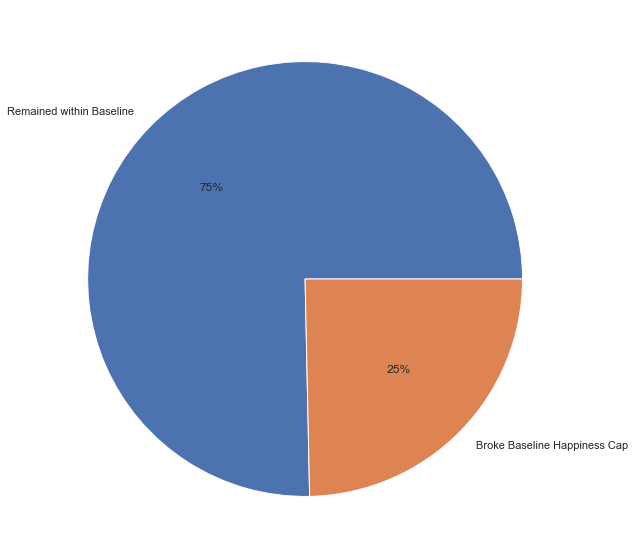

In [7]:
#Image experiment individual analysis
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(maxes1.value_counts(), labels = ["Remained within Baseline", "Broke Baseline Happiness Cap"], colors = sns.color_palette('deep'),autopct='%.0f%%')
plt.show()

## Video Survey: Individual Response Analysis for Exceeding Baseline

In [8]:
cols = []
for x in range(1,67):
    if x < 10:
        cols.append(f"Sad - 0{x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0")
    else:
        cols.append(f"Sad - {x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0")

#Determines if data breaks threshold
def broke_thres(item):
    if item > sadness_max:
        return 1
    else:
        return 0

#Filters results by post-experiment survey
#copy = cp.deepcopy(video_data)

#to_drop = copy[copy['SINGLE - asset_name_1_1_asset_id_1_0'] != 'Sad'].index
#copy.drop(to_drop, inplace=True)
#maxes2 = copy[cols].max(axis=1).apply(broke_thres)
maxes2 = video_data[cols].max(axis=1).apply(broke_thres)

print(maxes2.value_counts())

1    71
0    54
dtype: int64


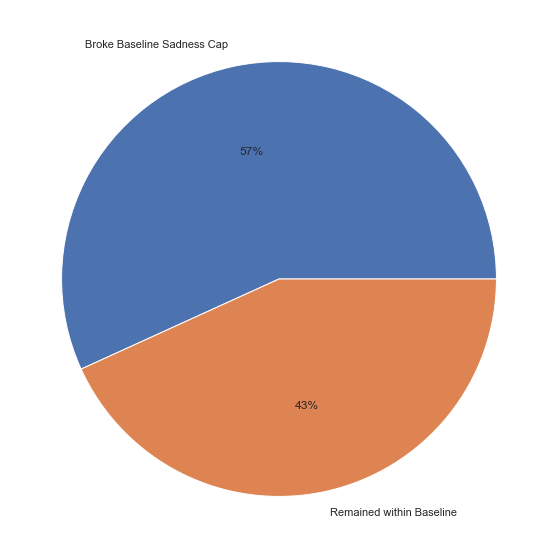

In [9]:
#Video experiment individual analysis graph
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(maxes2.value_counts(), labels = ["Broke Baseline Sadness Cap", "Remained within Baseline"], colors = sns.color_palette('deep'),autopct='%.0f%%')
plt.show()

## Aggregated Image Survey Results

<AxesSubplot:>

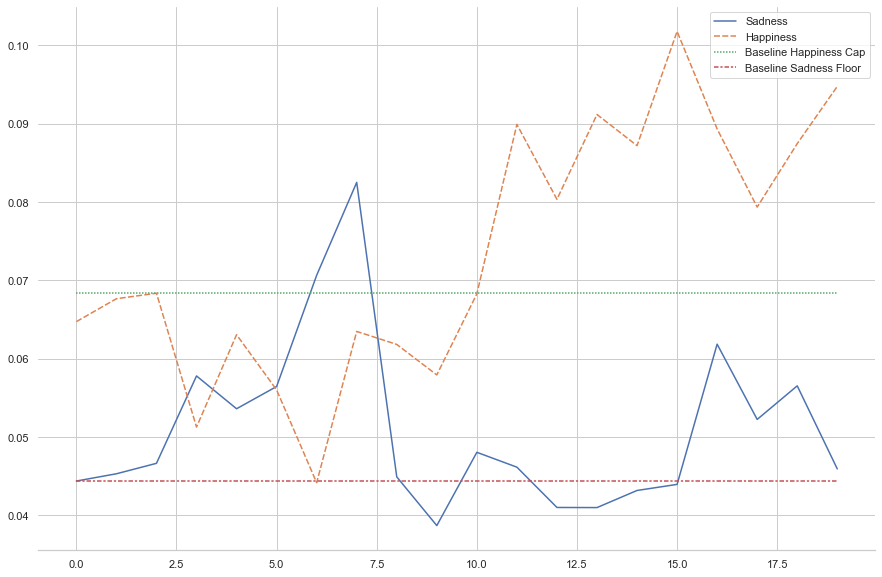

In [10]:
#Aggregate data for Image Experiment
fig, ax = plt.subplots(figsize=(15, 10))
sns.despine(left=True)
sns.lineplot(data = image_df)

## Aggregated Video Survey Results

<AxesSubplot:>

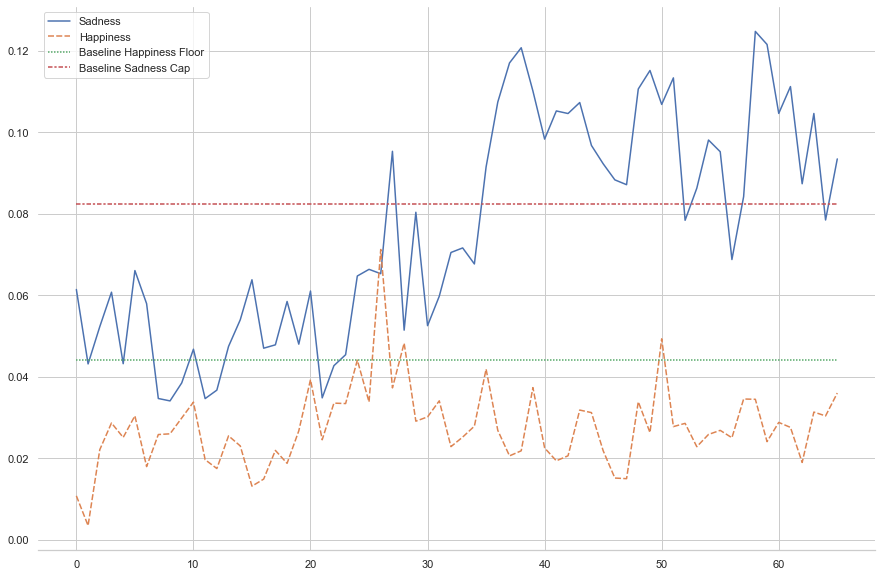

In [11]:
#Aggregate data for videoe experiment

# Key Moments
# Kid weaponizing scissors at 27s
# Kid bleeding out at 35-40s
# Door opens to child hiding in bathroom 50s
fig, ax = plt.subplots(figsize=(15, 10))
sns.despine(left=True)
sns.lineplot(data = video_df)

Emozo's software is proficient at collecting emotional data in aggregation - displaying elevated average levels for the emotions when respondents were shown stimuli aiming to evoke those emotions, and having all 3 key moments in the video that were hypothesized to cause spikes in sadness doing so. However, for individual analysis, the software does somewhat struggle to stay consistent, particularly with visual image stimuli.

Most trials (57%) with video stimuli correctly detected the intended emotion, but less than half that were correctly detected when static image stimuli was utilized. Our main metric was this accuracy, and we were looking to see if the majority of trials were correctly identified - Leading us to conclude that Emozo’s current ability to classify emotions is acceptable with video stimuli, correctly recognizing 57% of the trials, but cannot be relied upon for still image stimuli.

We experimented with filtering results by only those who manually entered that the dominant emotion they experienced was the one intended by that stimuli in the post-experiment survey, but this ended up being insignificant, just increasing both values for percentage of trials exceeding the baseline by a small amount.
